In [1]:
import pandas as pd
import scipy.io as scio
import h5py
import os
import sys
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

path_dir = '/liaoweiduo/HVC-Net-datasets'  # for ubuntu server
# path_dir = '//10.20.2.245/datasets/HV-Net-datasets'  # for windows

# Data set

## number of solution sets vs Hypervolume & number of solution sets vs number of solutions in each solution set

In [73]:
M = 3

## import data
train_data_file = f'train_data_M{M}_10.mat'
path = os.path.join(path_dir, 'data', train_data_file)
data = h5py.File(path)

solutionset = np.transpose(data.get('Data'))  # [dataset_num, data_num, M]
hvc = np.transpose(data.get('HVCval')) # [dataset_num, data_num]

# contain nan

max: 0.9553604096590047
min: 6.435910832047753e-14


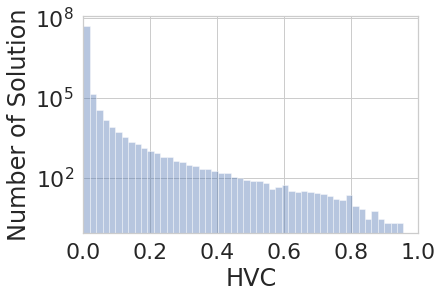

In [74]:
hvc_flatten = hvc[~np.isnan(hvc)]

collected_data = pd.DataFrame({'HVC': hvc_flatten})

## number of solution sets vs Hypervolume
## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
fig = sns.distplot(collected_data['HVC'], hist=True, kde=False, rug=False)
fig.set_yscale('log')
plt.ylabel('Number of Solution')
plt.xlim([0,1])
print('max:', hvc_flatten.max())
print('min:', hvc_flatten.min())

# ## save plt
# fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'HV_hist_M{M}_2.png'), dpi=300, bbox_inches='tight')

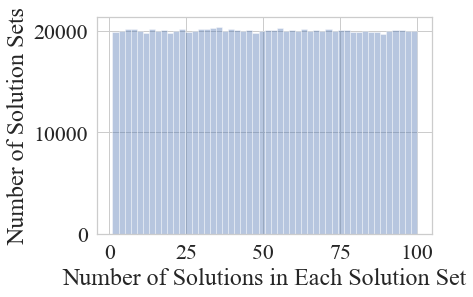

In [4]:
num_of_points = np.sum(~np.isnan(solutionset[:, :, 1]), axis=1)

collected_data = pd.DataFrame({'Number of Solutions in Each Solution Set': num_of_points})

## number of solution sets vs Hypervolume
## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
fig = sns.distplot(collected_data['Number of Solutions in Each Solution Set'], hist=True, kde=False, rug=False)
plt.ylabel('Number of Solution Sets')

## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'numpoints_hist_M{M}_2.png'), dpi=300, bbox_inches='tight')

# Train graph


time (h) used for training: 37.11806356072426


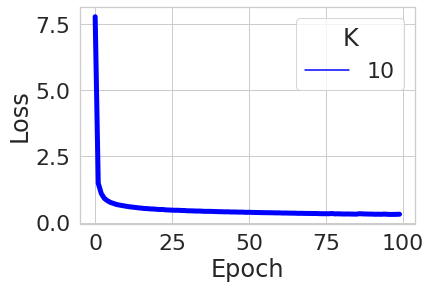

In [107]:
M = 10
collected_data = []

# ## num_blk = 3
# train_data_file = f'train_log_train_data_M{M}_100K_100_model_M{M}_100K_100.mat'
# path = os.path.join(path_dir, 'results', train_data_file)
# data = scio.loadmat(path)
# loss = data['loss'].reshape(-1)     # [1, 100] -> [100]
# time = data['time'].reshape(-1)     # [1, 100] -> [100]
# epoch = np.arange(loss.shape[0])
# collected_data.append(pd.DataFrame({'Loss': loss, 'Time': time, 'Epoch': epoch, 'K': 3}))

# print(f'time (h) used for training: {time[-1] / 3600.0}')

# ## num_blk = 5
# train_data_file = f'train_log_train_data_M{M}_100K_100_model_5_M{M}_100K_100.mat'
# path = os.path.join(path_dir, 'results', train_data_file)
# data = scio.loadmat(path)
# loss = data['loss'].reshape(-1)     # [1, 100] -> [100]
# time = data['time'].reshape(-1)     # [1, 100] -> [100]
# epoch = np.arange(loss.shape[0])
# collected_data.append(pd.DataFrame({'Loss': loss, 'Time': time, 'Epoch': epoch, 'K': 5}))

# print(f'time (h) used for training: {time[-1] / 3600.0}')

## num_blk = 10
train_data_file = f'train_log_train_data_M{M}_100K_100_model_10_M{M}_100K_100.mat'
path = os.path.join(path_dir, 'results', train_data_file)
data = scio.loadmat(path)
loss = data['loss'].reshape(-1)     # [1, 100] -> [100]
time = data['time'].reshape(-1)     # [1, 100] -> [100]
epoch = np.arange(loss.shape[0])
collected_data.append(pd.DataFrame({'Loss': loss, 'Time': time, 'Epoch': epoch, 'K': 10}))

print(f'time (h) used for training: {time[-1] / 3600.0}')


collected_data = pd.concat(collected_data, ignore_index=True)

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
fig = sns.lineplot(data=collected_data[['Epoch', 'Loss', 'K']], x="Epoch", y="Loss", hue="K", 
                   palette=['blue'], # , 'green', 'red'
                   linewidth=5)
# fig.set_xscale('log')
# fig.set_yscale('log')
# plt.ylim([1e-3, 1e-1])

## save plt
# fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'train_loss_M{M}_2.png'), dpi=300, bbox_inches='tight')

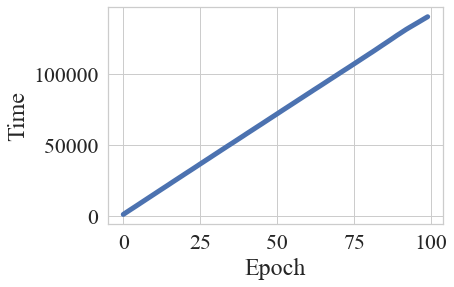

In [15]:
## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
fig = sns.lineplot(data=collected_data[['Epoch', 'Time']], x="Epoch", y="Time", linewidth=5)

## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'train_time_M{M}_2.png'), dpi=300, bbox_inches='tight')

# Test graph

In [56]:
M = 3
device = 'cuda'
collected_data = []
## import data

# HV-Net
error, CIRmin, CIRmax, time = [], [], [], []
for seed in range(1, 10):
    test_file = f'result_model_M{M}_HVNet_5_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, 'results', test_file)
    data = scio.loadmat(path)
    error.append(data['loss'].reshape(-1))
    CIRmin.append(data['CIR_min'].reshape(-1))
    CIRmax.append(data['CIR_max'].reshape(-1))
    time.append(data['time'].reshape(-1))
error = np.concatenate(error)
CIRmin = np.concatenate(CIRmin)
CIRmax = np.concatenate(CIRmax)
time = np.concatenate(time)
collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'HV-Net'}))    # index=[0]

# # Idea 2
# error, CIRmin, CIRmax, time = [], [], [], []
# for seed in range(10):
#     test_file = f'result_model_M{M}_old_10_test_data_M{M}_{seed}_{device}.mat'
#     path = os.path.join(path_dir, 'results', test_file)
#     data = scio.loadmat(path)
#     error.append(data['loss'].reshape(-1))
#     CIRmin.append(data['CIR_min'].reshape(-1))
#     CIRmax.append(data['CIR_max'].reshape(-1))
#     time.append(data['time'].reshape(-1))
# error = np.concatenate(error)
# CIRmin = np.concatenate(CIRmin)
# CIRmax = np.concatenate(CIRmax)
# time = np.concatenate(time)
# collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'Idea 2'}))    # index=[0]

# # softmax MSE
# error, CIRmin, CIRmax, time = [], [], [], []
# for seed in range(10):
#     test_file = f'result_model_M{M}_sfmse_10_test_data_M{M}_{seed}_{device}.mat'
#     path = os.path.join(path_dir, 'results', test_file)
#     data = scio.loadmat(path)
#     error.append(data['loss'].reshape(-1))
#     CIRmin.append(data['CIR_min'].reshape(-1))
#     CIRmax.append(data['CIR_max'].reshape(-1))
#     time.append(data['time'].reshape(-1))
# error = np.concatenate(error)
# CIRmin = np.concatenate(CIRmin)
# CIRmax = np.concatenate(CIRmax)
# time = np.concatenate(time)
# collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'sft MSE'}))    # index=[0]

# # order preservation
# error, CIRmin, CIRmax, time = [], [], [], []
# for seed in range(10):
#     test_file = f'result_model_M{M}_odprsv_scel_10_test_data_M{M}_{seed}_{device}.mat'
#     path = os.path.join(path_dir, 'results', test_file)
#     data = scio.loadmat(path)
#     error.append(data['loss'].reshape(-1))
#     CIRmin.append(data['CIR_min'].reshape(-1))
#     CIRmax.append(data['CIR_max'].reshape(-1))
#     time.append(data['time'].reshape(-1))
# error = np.concatenate(error)
# CIRmin = np.concatenate(CIRmin)
# CIRmax = np.concatenate(CIRmax)
# time = np.concatenate(time)
# collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'order reserv'}))    # index=[0]

# # minimal awareness
# error, CIRmin, CIRmax, time = [], [], [], []
# for seed in range(10):
#     test_file = f'result_model_M{M}_minaware_10_test_data_M{M}_{seed}_{device}.mat'
#     path = os.path.join(path_dir, 'results', test_file)
#     data = scio.loadmat(path)
#     error.append(data['loss'].reshape(-1))
#     CIRmin.append(data['CIR_min'].reshape(-1))
#     CIRmax.append(data['CIR_max'].reshape(-1))
#     time.append(data['time'].reshape(-1))
# error = np.concatenate(error)
# CIRmin = np.concatenate(CIRmin)
# CIRmax = np.concatenate(CIRmax)
# time = np.concatenate(time)
# collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'min aware'}))    # index=[0]

# Idea3 1M
error, CIRmin, CIRmax, time = [], [], [], []
for seed in range(1,10):
    test_file = f'result_model_M{M}_10_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, 'results', test_file)
    data = scio.loadmat(path)
    error.append(data['loss'].reshape(-1))
    CIRmin.append(data['CIR_min'].reshape(-1))
    CIRmax.append(data['CIR_max'].reshape(-1))
    time.append(data['time'].reshape(-1))
error = np.concatenate(error)
CIRmin = np.concatenate(CIRmin)
CIRmax = np.concatenate(CIRmax)
time = np.concatenate(time)
collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': '3 blk - 1M'}))    # index=[0]

# Idea3 100K
error, CIRmin, CIRmax, time = [], [], [], []
for seed in range(1,10):
    test_file = f'result_model_M{M}_100K_100_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, 'results', test_file)
    data = scio.loadmat(path)
    error.append(data['loss'].reshape(-1))
    CIRmin.append(data['CIR_min'].reshape(-1))
    CIRmax.append(data['CIR_max'].reshape(-1))
    time.append(data['time'].reshape(-1))
error = np.concatenate(error)
CIRmin = np.concatenate(CIRmin)
CIRmax = np.concatenate(CIRmax)
time = np.concatenate(time)
collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': '3 blk - 100K'}))    # index=[0]

# # Idea3 PF sample
# error, CIRmin, CIRmax, time = [], [], [], []
# for seed in range(1,10):
#     test_file = f'result_model_M{M}_100K_PF_test_data_M{M}_{seed}_{device}.mat'
#     path = os.path.join(path_dir, 'results', test_file)
#     data = scio.loadmat(path)
#     error.append(data['loss'].reshape(-1))
#     CIRmin.append(data['CIR_min'].reshape(-1))
#     CIRmax.append(data['CIR_max'].reshape(-1))
#     time.append(data['time'].reshape(-1))
# error = np.concatenate(error)
# CIRmin = np.concatenate(CIRmin)
# CIRmax = np.concatenate(CIRmax)
# time = np.concatenate(time)
# collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': '3 blk - PF'}))    # index=[0]

# Idea3 5layer 100K
error, CIRmin, CIRmax, time = [], [], [], []
for seed in range(1,10):
    test_file = f'result_model_5_M{M}_100K_100_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, 'results', test_file)
    data = scio.loadmat(path)
    error.append(data['loss'].reshape(-1))
    CIRmin.append(data['CIR_min'].reshape(-1))
    CIRmax.append(data['CIR_max'].reshape(-1))
    time.append(data['time'].reshape(-1))
error = np.concatenate(error)
CIRmin = np.concatenate(CIRmin)
CIRmax = np.concatenate(CIRmax)
time = np.concatenate(time)
collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': '5 blk - 100K'}))    # index=[0]

collected_data = pd.concat(collected_data, ignore_index=True)

collected_data.head()


,Approximation Error,CIR min,CIR max,Runtime,Method
0,477.417208,0.1198,0.5221,10.950294,HV-Net
1,2221.216927,0.1161,0.5140,11.342589,HV-Net
2,512.612763,0.1128,0.5108,11.061878,HV-Net
3,293.949646,0.1182,0.5039,10.927310,HV-Net
4,730.950044,0.1133,0.5117,11.086932,HV-Net


In [90]:
M = 10
device = 'cuda'
collected_data = []
## import data

# HV-Net
error, CIRmin, CIRmax, time = [], [], [], []
for seed in range(1, 10):
    test_file = f'result_model_M{M}_HVNet_5_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, 'results', test_file)
    data = scio.loadmat(path)
    error.append(data['loss'].reshape(-1))
    CIRmin.append(data['CIR_min'].reshape(-1))
    CIRmax.append(data['CIR_max'].reshape(-1))
    time.append(data['time'].reshape(-1))
error = np.concatenate(error)
CIRmin = np.concatenate(CIRmin)
CIRmax = np.concatenate(CIRmax)
time = np.concatenate(time)
collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'HV-Net'}))    # index=[0]

# # Idea3 100K
# error, CIRmin, CIRmax, time = [], [], [], []
# for seed in range(1,10):
#     test_file = f'result_model_M{M}_100K_100_test_data_M{M}_{seed}_{device}.mat'
#     path = os.path.join(path_dir, 'results', test_file)
#     data = scio.loadmat(path)
#     error.append(data['loss'].reshape(-1))
#     CIRmin.append(data['CIR_min'].reshape(-1))
#     CIRmax.append(data['CIR_max'].reshape(-1))
#     time.append(data['time'].reshape(-1))
# error = np.concatenate(error)
# CIRmin = np.concatenate(CIRmin)
# CIRmax = np.concatenate(CIRmax)
# time = np.concatenate(time)
# collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'K=3'}))    # index=[0]

# # Idea3 5layer 100K
# error, CIRmin, CIRmax, time = [], [], [], []
# for seed in range(1,10):
#     test_file = f'result_model_5_M{M}_100K_100_test_data_M{M}_{seed}_{device}.mat'
#     path = os.path.join(path_dir, 'results', test_file)
#     data = scio.loadmat(path)
#     error.append(data['loss'].reshape(-1))
#     CIRmin.append(data['CIR_min'].reshape(-1))
#     CIRmax.append(data['CIR_max'].reshape(-1))
#     time.append(data['time'].reshape(-1))
# error = np.concatenate(error)
# CIRmin = np.concatenate(CIRmin)
# CIRmax = np.concatenate(CIRmax)
# time = np.concatenate(time)
# collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'K=5'}))    # index=[0]

# Idea3 10layer 100K
error, CIRmin, CIRmax, time = [], [], [], []
for seed in range(1,10):
    test_file = f'result_model_10_M{M}_100K_100_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, 'results', test_file)
    data = scio.loadmat(path)
    error.append(data['loss'].reshape(-1))
    CIRmin.append(data['CIR_min'].reshape(-1))
    CIRmax.append(data['CIR_max'].reshape(-1))
    time.append(data['time'].reshape(-1))
error = np.concatenate(error)
CIRmin = np.concatenate(CIRmin)
CIRmax = np.concatenate(CIRmax)
time = np.concatenate(time)
collected_data.append(pd.DataFrame({'Approximation Error': error, 'CIR min': CIRmin, 'CIR max': CIRmax, 'Runtime': time, 'Method': 'K=10'}))    # index=[0]

collected_data = pd.concat(collected_data, ignore_index=True)

collected_data.head()


,Approximation Error,CIR min,CIR max,Runtime,Method
0,40573.263057,0.0934,0.9517,12.516009,HV-Net
1,83522.374398,0.0954,0.9499,12.253673,HV-Net
2,137380.571025,0.0924,0.9493,12.643609,HV-Net
3,782587.399130,0.0921,0.9463,11.384516,HV-Net
4,411962.003076,0.0944,0.9476,11.533176,HV-Net


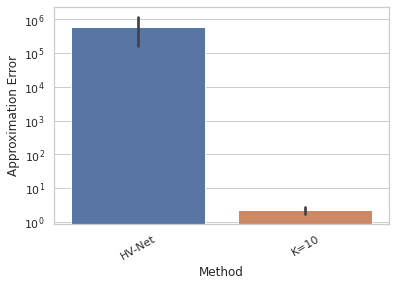

In [91]:

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=1)
plt.figure()
ax = sns.barplot(data=collected_data, x="Method", y="Approximation Error")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_yscale('log')
# plt.legend(loc='upper right', framealpha=1.0)

# ## save plt
# fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}.png'), dpi=300, bbox_inches='tight')


[Text(0, 0, 'HV-Net'), Text(1, 0, 'K=10')]

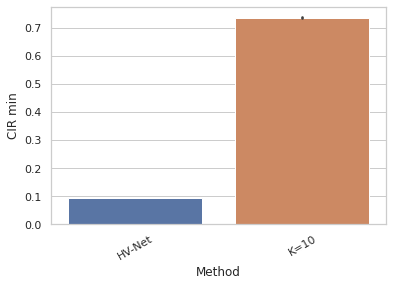

In [92]:

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=1)
plt.figure()
ax = sns.barplot(data=collected_data, x="Method", y="CIR min")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
# ax.set_yscale('log')
# plt.legend(loc='upper right', framealpha=1.0)

# ## save plt
# fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}.png'), dpi=300, bbox_inches='tight')


[Text(0, 0, 'HV-Net'), Text(1, 0, 'K=10')]

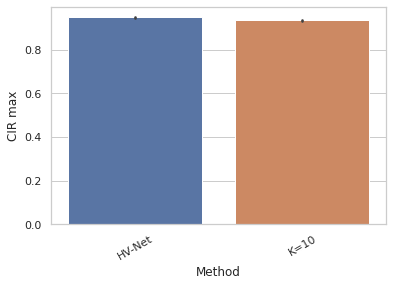

In [93]:

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=1)
plt.figure()
ax = sns.barplot(data=collected_data, x="Method", y="CIR max")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
# ax.set_yscale('log')
# plt.legend(loc='upper right', framealpha=1.0)

# ## save plt
# fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}.png'), dpi=300, bbox_inches='tight')


[Text(0, 0, 'HV-Net'), Text(1, 0, 'K=10')]

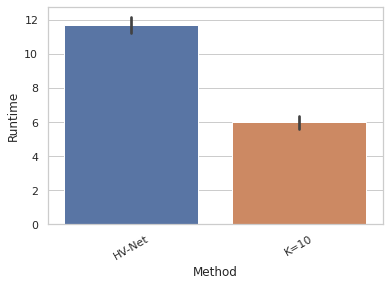

In [94]:

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=1)
plt.figure()
ax = sns.barplot(data=collected_data, x="Method", y="Runtime")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
# ax.set_yscale('log')
# plt.legend(loc='upper right', framealpha=1.0)

# ## save plt
# fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}.png'), dpi=300, bbox_inches='tight')


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


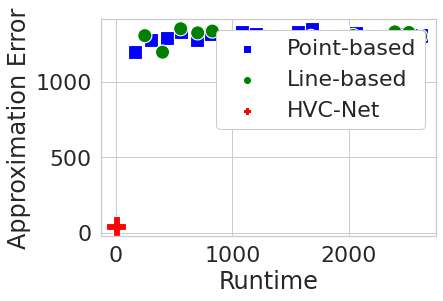

In [2]:
M = 3
collected_data = []
## import data
loss_MC, time_MC, loss_R2, time_R2 = [], [], [], []
for seed in range(10):
    test_MCR2_file = f'result_MC_R2_test_data_M{M}_{seed}.mat'
    path = os.path.join(path_dir, 'results', test_MCR2_file)
    data = scio.loadmat(path)
    loss_MC.append(data['Loss'].reshape(-1))     # [20,]
    time_MC.append(data['Time'].reshape(-1))     # [20,]
    loss_R2.append(data['Loss1'].reshape(-1))    # [20,]
    time_R2.append(data['Time1'].reshape(-1))    # [20,]

loss_MC = np.mean(np.stack(loss_MC), axis=0)     # [20,]
time_MC = np.mean(np.stack(time_MC), axis=0)     # [20,]
loss_R2 = np.mean(np.stack(loss_R2), axis=0)     # [20,]
time_R2 = np.mean(np.stack(time_R2), axis=0)     # [20,]

collected_data.append(pd.DataFrame({'Approximation Error': loss_MC, 'Runtime': time_MC, 'Method': 'Point-based'}))
collected_data.append(pd.DataFrame({'Approximation Error': loss_R2, 'Runtime': time_R2, 'Method': 'Line-based'}))

device = 'cuda'
loss_net, time_net = [], []
for seed in range(1, 10):
    test_net_file = f'result_model_10_M{M}_100K_100_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, 'results', test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HVC-Net'}, index=[0]))

collected_data = pd.concat(collected_data, ignore_index=True)

# print(collected_data)

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
size = [200 for _ in range(40)]
size.append(400)
fig = sns.scatterplot(data=collected_data, x="Runtime", y="Approximation Error",
                      hue="Method", palette=['blue', 'green', 'red'],
                      style="Method",
                      markers=['s', 'o','P'],
                      s=size)

plt.legend(loc='upper right', framealpha=1.0)

## save plt
# fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}.png'), dpi=300, bbox_inches='tight')

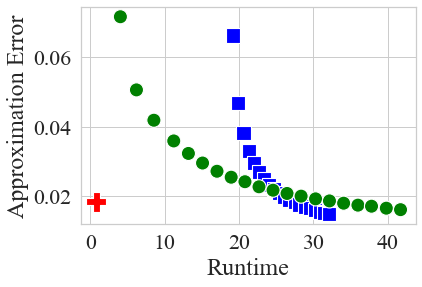

In [38]:
M = 3
collected_data = []
## import data
loss_MC, time_MC, loss_R2, time_R2 = [], [], [], []
for seed in range(20):
    test_MCR2_file = f'result_MC_R2_test_data_M{M}_{seed}.mat'
    path = os.path.join(path_dir, test_MCR2_file)
    data = scio.loadmat(path)
    loss_MC.append(data['Loss'].reshape(-1))     # [20,]
    time_MC.append(data['Time'].reshape(-1))     # [20,]
    loss_R2.append(data['Loss1'].reshape(-1))    # [20,]
    time_R2.append(data['Time1'].reshape(-1))    # [20,]

loss_MC = np.mean(np.stack(loss_MC), axis=0)     # [20,]
time_MC = np.mean(np.stack(time_MC), axis=0)     # [20,]
loss_R2 = np.mean(np.stack(loss_R2), axis=0)     # [20,]
time_R2 = np.mean(np.stack(time_R2), axis=0)     # [20,]

collected_data.append(pd.DataFrame({'Approximation Error': loss_MC, 'Runtime': time_MC, 'Method': 'Point-based'}))
collected_data.append(pd.DataFrame({'Approximation Error': loss_R2, 'Runtime': time_R2, 'Method': 'Line-based'}))

device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net'}, index=[0]))

collected_data = pd.concat(collected_data, ignore_index=True)

# print(collected_data)

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
size = [200 for _ in range(40)]
size.append(400)
fig = sns.scatterplot(data=collected_data, x="Runtime", y="Approximation Error",
                      hue="Method", palette=['blue', 'green', 'red'],
                      style="Method",
                      markers=['s', 'o','P'],
                      s=size, legend=False)
# plt.setp(fig.get_legend().get_title(), fontsize=10)
# plt.setp(fig.get_legend().get_texts(), fontsize=10)

## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}_nolegend.png'), dpi=300, bbox_inches='tight')

### HV-Net vs HV-Net_1 vs HV_Net_2 vs Point-based vs Line-based

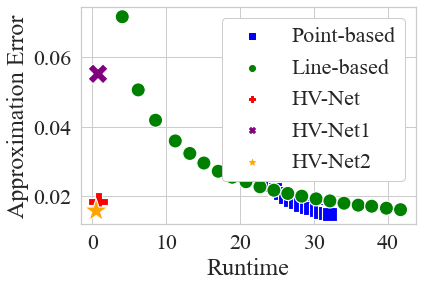

In [43]:
M = 3
collected_data = []
## import data
loss_MC, time_MC, loss_R2, time_R2 = [], [], [], []
for seed in range(20):
    test_MCR2_file = f'result_MC_R2_test_data_M{M}_{seed}.mat'
    path = os.path.join(path_dir, test_MCR2_file)
    data = scio.loadmat(path)
    loss_MC.append(data['Loss'].reshape(-1))     # [20,]
    time_MC.append(data['Time'].reshape(-1))     # [20,]
    loss_R2.append(data['Loss1'].reshape(-1))    # [20,]
    time_R2.append(data['Time1'].reshape(-1))    # [20,]

loss_MC = np.mean(np.stack(loss_MC), axis=0)     # [20,]
time_MC = np.mean(np.stack(time_MC), axis=0)     # [20,]
loss_R2 = np.mean(np.stack(loss_R2), axis=0)     # [20,]
time_R2 = np.mean(np.stack(time_R2), axis=0)     # [20,]

collected_data.append(pd.DataFrame({'Approximation Error': loss_MC, 'Runtime': time_MC, 'Method': 'Point-based'}))
collected_data.append(pd.DataFrame({'Approximation Error': loss_R2, 'Runtime': time_R2, 'Method': 'Line-based'}))

device = 'cpu'
# HV-Net
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net'}, index=[0]))

# HV-Net_1   (MSE)
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MSE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net1'}, index=[0]))

# HV-Net_2   (MAPE)
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MAPE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net2'}, index=[0]))

collected_data = pd.concat(collected_data, ignore_index=True)

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
size = [200 for _ in range(40)]
size.extend([400, 400, 600])
fig = sns.scatterplot(data=collected_data, x="Runtime", y="Approximation Error",
                      hue="Method", palette=['blue', 'green', 'red', 'purple', 'orange'],
                      style="Method",
                      markers=['s', 'o', 'P','X','*'],
                      s=size)

plt.legend(loc='upper right', framealpha=1.0)

## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}_all.png'), dpi=300, bbox_inches='tight')

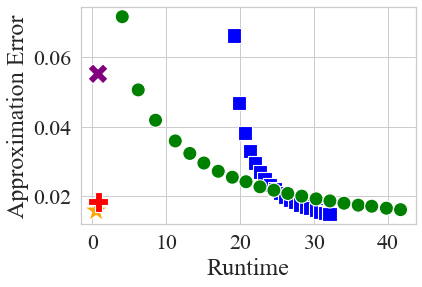

In [55]:
M = 3
collected_data = []
## import data
loss_MC, time_MC, loss_R2, time_R2 = [], [], [], []
for seed in range(20):
    test_MCR2_file = f'result_MC_R2_test_data_M{M}_{seed}.mat'
    path = os.path.join(path_dir, test_MCR2_file)
    data = scio.loadmat(path)
    loss_MC.append(data['Loss'].reshape(-1))     # [20,]
    time_MC.append(data['Time'].reshape(-1))     # [20,]
    loss_R2.append(data['Loss1'].reshape(-1))    # [20,]
    time_R2.append(data['Time1'].reshape(-1))    # [20,]

loss_MC = np.mean(np.stack(loss_MC), axis=0)     # [20,]
time_MC = np.mean(np.stack(time_MC), axis=0)     # [20,]
loss_R2 = np.mean(np.stack(loss_R2), axis=0)     # [20,]
time_R2 = np.mean(np.stack(time_R2), axis=0)     # [20,]

collected_data.append(pd.DataFrame({'Approximation Error': loss_MC, 'Runtime': time_MC, 'Method': 'Point-based'}))
collected_data.append(pd.DataFrame({'Approximation Error': loss_R2, 'Runtime': time_R2, 'Method': 'Line-based'}))

device = 'cpu'
# HV-Net_1   (MSE)
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MSE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net1'}, index=[0]))

# HV-Net_2   (MAPE)
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MAPE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net2'}, index=[0]))

# HV-Net
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net'}, index=[0]))

collected_data = pd.concat(collected_data, ignore_index=True)

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
size = [200 for _ in range(40)]
size.extend([400, 600, 400])
fig = sns.scatterplot(data=collected_data, x="Runtime", y="Approximation Error",
                      hue="Method", palette=['blue', 'green', 'purple', 'orange', 'red'],
                      style="Method",
                      markers=['s', 'o', 'X', '*', 'P'],
                      s=size, legend=False)

## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}_all_nolegend.png'), dpi=300, bbox_inches='tight')

## M5

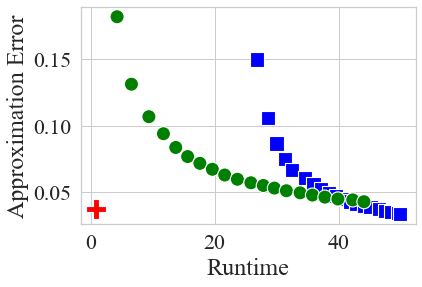

In [45]:
M = 5
collected_data = []
## import data
loss_MC, time_MC, loss_R2, time_R2 = [], [], [], []
for seed in range(20):
    test_MCR2_file = f'result_MC_R2_test_data_M{M}_{seed}.mat'
    path = os.path.join(path_dir, test_MCR2_file)
    data = scio.loadmat(path)
    loss_MC.append(data['Loss'].reshape(-1))     # [20,]
    time_MC.append(data['Time'].reshape(-1))     # [20,]
    loss_R2.append(data['Loss1'].reshape(-1))    # [20,]
    time_R2.append(data['Time1'].reshape(-1))    # [20,]

loss_MC = np.mean(np.stack(loss_MC), axis=0)     # [20,]
time_MC = np.mean(np.stack(time_MC), axis=0)     # [20,]
loss_R2 = np.mean(np.stack(loss_R2), axis=0)     # [20,]
time_R2 = np.mean(np.stack(time_R2), axis=0)     # [20,]

collected_data.append(pd.DataFrame({'Approximation Error': loss_MC, 'Runtime': time_MC, 'Method': 'Point-based'}))
collected_data.append(pd.DataFrame({'Approximation Error': loss_R2, 'Runtime': time_R2, 'Method': 'Line-based'}))

device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net'}, index=[0]))

collected_data = pd.concat(collected_data, ignore_index=True)

# print(collected_data)

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
size = [200 for _ in range(40)]
size.append(400)
fig = sns.scatterplot(data=collected_data, x="Runtime", y="Approximation Error",
                      hue="Method", palette=['blue', 'green', 'red'],
                      style="Method",
                      markers=['s', 'o','P'],
                      s=size, legend=False)
## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}.png'), dpi=300, bbox_inches='tight')

### HV-Net vs HV-Net_1 vs HV_Net_2 vs Point-based vs Line-based

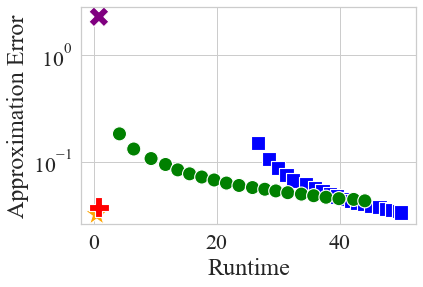

In [54]:
M = 5
collected_data = []
## import data
loss_MC, time_MC, loss_R2, time_R2 = [], [], [], []
for seed in range(20):
    test_MCR2_file = f'result_MC_R2_test_data_M{M}_{seed}.mat'
    path = os.path.join(path_dir, test_MCR2_file)
    data = scio.loadmat(path)
    loss_MC.append(data['Loss'].reshape(-1))     # [20,]
    time_MC.append(data['Time'].reshape(-1))     # [20,]
    loss_R2.append(data['Loss1'].reshape(-1))    # [20,]
    time_R2.append(data['Time1'].reshape(-1))    # [20,]

loss_MC = np.mean(np.stack(loss_MC), axis=0)     # [20,]
time_MC = np.mean(np.stack(time_MC), axis=0)     # [20,]
loss_R2 = np.mean(np.stack(loss_R2), axis=0)     # [20,]
time_R2 = np.mean(np.stack(time_R2), axis=0)     # [20,]

collected_data.append(pd.DataFrame({'Approximation Error': loss_MC, 'Runtime': time_MC, 'Method': 'Point-based'}))
collected_data.append(pd.DataFrame({'Approximation Error': loss_R2, 'Runtime': time_R2, 'Method': 'Line-based'}))

device = 'cpu'
# HV-Net_1   (MSE)
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MSE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net_1'}, index=[0]))

# HV-Net_2   (MAPE)
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MAPE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net_2'}, index=[0]))

# HV-Net
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net'}, index=[0]))

collected_data = pd.concat(collected_data, ignore_index=True)

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
size = [200 for _ in range(40)]
size.extend([400, 600, 400])
fig = sns.scatterplot(data=collected_data, x="Runtime", y="Approximation Error",
                      hue="Method", palette=['blue', 'green', 'purple', 'orange', 'red'],
                      style="Method",
                      markers=['s', 'o', 'X', '*', 'P'],
                      s=size, legend=False)
fig.set_yscale('log')

## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}_all.png'), dpi=300, bbox_inches='tight')

## M8

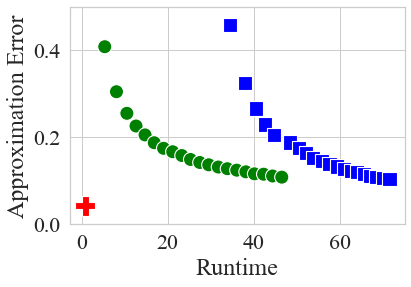

In [57]:
M = 8
collected_data = []
## import data
loss_MC, time_MC, loss_R2, time_R2 = [], [], [], []
for seed in range(20):
    test_MCR2_file = f'result_MC_R2_test_data_M{M}_{seed}.mat'
    path = os.path.join(path_dir, test_MCR2_file)
    data = scio.loadmat(path)
    loss_MC.append(data['Loss'].reshape(-1))     # [20,]
    time_MC.append(data['Time'].reshape(-1))     # [20,]
    loss_R2.append(data['Loss1'].reshape(-1))    # [20,]
    time_R2.append(data['Time1'].reshape(-1))    # [20,]

loss_MC = np.mean(np.stack(loss_MC), axis=0)     # [20,]
time_MC = np.mean(np.stack(time_MC), axis=0)     # [20,]
loss_R2 = np.mean(np.stack(loss_R2), axis=0)     # [20,]
time_R2 = np.mean(np.stack(time_R2), axis=0)     # [20,]

collected_data.append(pd.DataFrame({'Approximation Error': loss_MC, 'Runtime': time_MC, 'Method': 'Point-based'}))
collected_data.append(pd.DataFrame({'Approximation Error': loss_R2, 'Runtime': time_R2, 'Method': 'Line-based'}))

device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net'}, index=[0]))

collected_data = pd.concat(collected_data, ignore_index=True)

# print(collected_data)

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
size = [200 for _ in range(40)]
size.append(400)
fig = sns.scatterplot(data=collected_data, x="Runtime", y="Approximation Error",
                      hue="Method", palette=['blue', 'green', 'red'],
                      style="Method",
                      markers=['s', 'o','P'],
                      s=size, legend=False)
plt.ylim([0.0, 0.5])

## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}.png'), dpi=300, bbox_inches='tight')

### HV-Net vs HV-Net_1 vs HV_Net_2 vs Point-based vs Line-based

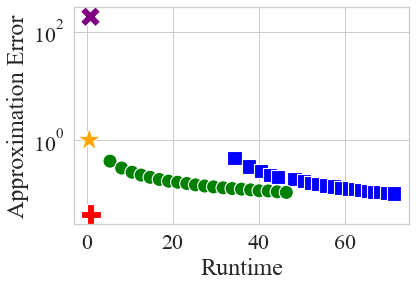

In [53]:
M = 8
collected_data = []
## import data
loss_MC, time_MC, loss_R2, time_R2 = [], [], [], []
for seed in range(20):
    test_MCR2_file = f'result_MC_R2_test_data_M{M}_{seed}.mat'
    path = os.path.join(path_dir, test_MCR2_file)
    data = scio.loadmat(path)
    loss_MC.append(data['Loss'].reshape(-1))     # [20,]
    time_MC.append(data['Time'].reshape(-1))     # [20,]
    loss_R2.append(data['Loss1'].reshape(-1))    # [20,]
    time_R2.append(data['Time1'].reshape(-1))    # [20,]

loss_MC = np.mean(np.stack(loss_MC), axis=0)     # [20,]
time_MC = np.mean(np.stack(time_MC), axis=0)     # [20,]
loss_R2 = np.mean(np.stack(loss_R2), axis=0)     # [20,]
time_R2 = np.mean(np.stack(time_R2), axis=0)     # [20,]

collected_data.append(pd.DataFrame({'Approximation Error': loss_MC, 'Runtime': time_MC, 'Method': 'Point-based'}))
collected_data.append(pd.DataFrame({'Approximation Error': loss_R2, 'Runtime': time_R2, 'Method': 'Line-based'}))

device = 'cpu'
# HV-Net_1   (MSE)
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MSE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net_1'}, index=[0]))

# HV-Net_2   (MAPE)
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MAPE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net_2'}, index=[0]))

# HV-Net
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net'}, index=[0]))

collected_data = pd.concat(collected_data, ignore_index=True)

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
size = [200 for _ in range(40)]
size.extend([400, 600, 400])
fig = sns.scatterplot(data=collected_data, x="Runtime", y="Approximation Error",
                      hue="Method", palette=['blue', 'green', 'purple', 'orange', 'red'],
                      style="Method",
                      markers=['s', 'o', 'X', '*', 'P'],
                      s=size, legend=False)
fig.set_yscale('log')

## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}_all.png'), dpi=300, bbox_inches='tight')

## M10

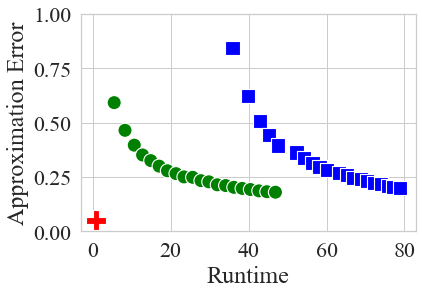

In [58]:
M = 10
collected_data = []
## import data
loss_MC, time_MC, loss_R2, time_R2 = [], [], [], []
for seed in range(20):
    test_MCR2_file = f'result_MC_R2_test_data_M{M}_{seed}.mat'
    path = os.path.join(path_dir, test_MCR2_file)
    data = scio.loadmat(path)
    loss_MC.append(data['Loss'].reshape(-1))     # [20,]
    time_MC.append(data['Time'].reshape(-1))     # [20,]
    loss_R2.append(data['Loss1'].reshape(-1))    # [20,]
    time_R2.append(data['Time1'].reshape(-1))    # [20,]

loss_MC = np.mean(np.stack(loss_MC), axis=0)     # [20,]
time_MC = np.mean(np.stack(time_MC), axis=0)     # [20,]
loss_R2 = np.mean(np.stack(loss_R2), axis=0)     # [20,]
time_R2 = np.mean(np.stack(time_R2), axis=0)     # [20,]

collected_data.append(pd.DataFrame({'Approximation Error': loss_MC, 'Runtime': time_MC, 'Method': 'Point-based'}))
collected_data.append(pd.DataFrame({'Approximation Error': loss_R2, 'Runtime': time_R2, 'Method': 'Line-based'}))

device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net'}, index=[0]))

collected_data = pd.concat(collected_data, ignore_index=True)

# print(collected_data)

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
size = [200 for _ in range(40)]
size.append(400)
fig = sns.scatterplot(data=collected_data, x="Runtime", y="Approximation Error",
                      hue="Method", palette=['blue', 'green', 'red'],
                      style="Method",
                      markers=['s', 'o','P'],
                      s=size, legend=False)
plt.ylim([0.0, 1.0])

## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}.png'), dpi=300, bbox_inches='tight')

### HV-Net vs HV-Net_1 vs HV_Net_2 vs Point-based vs Line-based

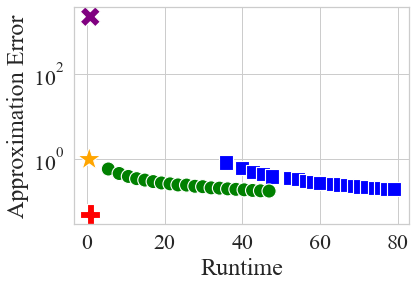

In [50]:
M = 10
collected_data = []
## import data
loss_MC, time_MC, loss_R2, time_R2 = [], [], [], []
for seed in range(20):
    test_MCR2_file = f'result_MC_R2_test_data_M{M}_{seed}.mat'
    path = os.path.join(path_dir, test_MCR2_file)
    data = scio.loadmat(path)
    loss_MC.append(data['Loss'].reshape(-1))     # [20,]
    time_MC.append(data['Time'].reshape(-1))     # [20,]
    loss_R2.append(data['Loss1'].reshape(-1))    # [20,]
    time_R2.append(data['Time1'].reshape(-1))    # [20,]

loss_MC = np.mean(np.stack(loss_MC), axis=0)     # [20,]
time_MC = np.mean(np.stack(time_MC), axis=0)     # [20,]
loss_R2 = np.mean(np.stack(loss_R2), axis=0)     # [20,]
time_R2 = np.mean(np.stack(time_R2), axis=0)     # [20,]

collected_data.append(pd.DataFrame({'Approximation Error': loss_MC, 'Runtime': time_MC, 'Method': 'Point-based'}))
collected_data.append(pd.DataFrame({'Approximation Error': loss_R2, 'Runtime': time_R2, 'Method': 'Line-based'}))

device = 'cpu'
# HV-Net_1   (MSE)
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MSE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net_1'}, index=[0]))

# HV-Net_2   (MAPE)
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MAPE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net_2'}, index=[0]))

# HV-Net
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(data['loss'].reshape(-1))
    time_net.append(data['time'].reshape(-1))

loss_net = np.mean(np.stack(loss_net), axis=0)
time_net = np.mean(np.stack(time_net), axis=0)
collected_data.append(pd.DataFrame({'Approximation Error': loss_net, 'Runtime': time_net, 'Method': 'HV-Net'}, index=[0]))

collected_data = pd.concat(collected_data, ignore_index=True)

## draw plot
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=2)
plt.figure()
size = [200 for _ in range(40)]
size.extend([400, 600, 400])
fig = sns.scatterplot(data=collected_data, x="Runtime", y="Approximation Error",
                      hue="Method", palette=['blue', 'green', 'purple', 'orange', 'red'],
                      style="Method",
                      markers=['s', 'o', 'X', '*', 'P'],
                      s=size, legend=False)
fig.set_yscale('log')

## save plt
fig.get_figure().savefig(os.path.join(path_dir, 'figure', f'test_M{M}_{device}_all.png'), dpi=300, bbox_inches='tight')

# Table

for test data

In [66]:
collected_data = []

## M3, HVnet
M = 3
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M5, HVnet
M = 5
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M8, HVnet
M = 8
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M10, HVnet
M = 10
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M3, HVnet1
M = 3
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MSE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net1', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M5, HVnet1
M = 5
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MSE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net1', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M8, HVnet1
M = 8
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MSE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net1', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M10, HVnet1
M = 10
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MSE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net1', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M3, HVnet2
M = 3
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MAPE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net2', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M5, HVnet2
M = 5
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MAPE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net2', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M8, HVnet2
M = 8
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MAPE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net2', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M10, HVnet2
M = 10
device = 'cpu'
loss_net, time_net = [], []
for seed in range(20):
    test_net_file = f'result_model_M{M}_MAPE_2_test_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net2', 'Approximation Error': loss_net, 'Runtime': time_net}))


collected_data = pd.concat(collected_data, ignore_index=True)
print(collected_data.head())

   M  Method  Approximation Error   Runtime
0  3  HV-Net             0.018017  0.747908
1  3  HV-Net             0.018671  0.837171
2  3  HV-Net             0.018173  0.746521
3  3  HV-Net             0.018076  0.816422
4  3  HV-Net             0.018529  0.782115


In [77]:
## 统计信息

print('mean\n', collected_data.groupby(['M', 'Method'])['Approximation Error'].mean())
print('std\n', collected_data.groupby(['M', 'Method'])['Approximation Error'].std())

mean
 M   Method 
3   HV-Net        0.018541
    HV-Net1       0.055279
    HV-Net2       0.015878
5   HV-Net        0.037459
    HV-Net1       2.270159
    HV-Net2       0.032067
8   HV-Net        0.042566
    HV-Net1     187.189718
    HV-Net2       1.000000
10  HV-Net        0.050867
    HV-Net1    2212.552783
    HV-Net2       1.000000
Name: Approximation Error, dtype: float64
std
 M   Method 
3   HV-Net        0.000610
    HV-Net1       0.049188
    HV-Net2       0.000474
5   HV-Net        0.019415
    HV-Net1       3.372767
    HV-Net2       0.004108
8   HV-Net        0.009939
    HV-Net1     445.316438
    HV-Net2       0.000000
10  HV-Net        0.013152
    HV-Net1    6384.454910
    HV-Net2       0.000000
Name: Approximation Error, dtype: float64


for train data

In [81]:
collected_data = []

## M3, HVnet
M = 3
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M5, HVnet
M = 5
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M8, HVnet
M = 8
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M10, HVnet
M = 10
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M3, HVnet1
M = 3
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_MSE_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net1', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M5, HVnet1
M = 5
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_MSE_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net1', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M8, HVnet1
M = 8
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_MSE_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net1', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M10, HVnet1
M = 10
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_MSE_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net1', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M3, HVnet2
M = 3
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_MAPE_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net2', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M5, HVnet2
M = 5
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_MAPE_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net2', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M8, HVnet2
M = 8
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_MAPE_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net2', 'Approximation Error': loss_net, 'Runtime': time_net}))

## M10, HVnet2
M = 10
device = 'cuda'
loss_net, time_net = [], []
for seed in range(2,3):
    test_net_file = f'result_model_M{M}_MAPE_2_train_data_M{M}_{seed}_{device}.mat'
    path = os.path.join(path_dir, test_net_file)
    data = scio.loadmat(path)
    loss_net.append(float(data['loss']))
    time_net.append(float(data['time']))

collected_data.append(pd.DataFrame({'M': M,  'Method': 'HV-Net2', 'Approximation Error': loss_net, 'Runtime': time_net}))


collected_data = pd.concat(collected_data, ignore_index=True)
print(collected_data.head())

    M   Method  Approximation Error      Runtime
0   3   HV-Net             0.018489  2627.757659
1   5   HV-Net             0.030241  2647.382997
2   8   HV-Net             0.036301  2646.048841
3  10   HV-Net             0.042178  2638.513413
4   3  HV-Net1             0.056103  2629.771329


In [82]:
## 统计信息

print('mean\n', collected_data.groupby(['M', 'Method'])['Approximation Error'].mean())
print('std\n', collected_data.groupby(['M', 'Method'])['Approximation Error'].std())


mean
 M   Method 
3   HV-Net        0.018489
    HV-Net1       0.056103
    HV-Net2       0.015699
5   HV-Net        0.030241
    HV-Net1       4.777839
    HV-Net2       0.030650
8   HV-Net        0.036301
    HV-Net1    1094.425093
    HV-Net2       1.000000
10  HV-Net        0.042178
    HV-Net1    6848.726503
    HV-Net2       1.000000
Name: Approximation Error, dtype: float64
std
 M   Method 
3   HV-Net    NaN
    HV-Net1   NaN
    HV-Net2   NaN
5   HV-Net    NaN
    HV-Net1   NaN
    HV-Net2   NaN
8   HV-Net    NaN
    HV-Net1   NaN
    HV-Net2   NaN
10  HV-Net    NaN
    HV-Net1   NaN
    HV-Net2   NaN
Name: Approximation Error, dtype: float64
